# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [9]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2_contingency

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [11]:
#code here
df["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [12]:
df_dragon = df[df["Type 1"]=="Dragon"]["HP"]
df_grass = df[df["Type 1"]=="Grass"]["HP"]


In [13]:
df_grass.mean()

67.27142857142857

In [14]:
df_dragon.mean()

83.3125

In [15]:
#Set the hypothesis

#H0: mu_hp dragon <= mu_hp grass
#H1: mu_hp dragon > mu_hp grass

#significance level = 0.05

In [16]:
st.ttest_ind(df_dragon,df_grass, equal_var=False)

TtestResult(statistic=3.3349632905124063, pvalue=0.0015987219490841197, df=50.83784116232685)

Dragons have more HP! with 95% of confidence

- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [17]:
#code here
df_leg_hp = df[df["Legendary"]==True]["HP"]
df_nonleg_hp = df[df["Legendary"]==False]["HP"]

In [18]:
df_leg_hp.mean()

92.73846153846154

In [19]:
df_nonleg_hp.mean()

67.18231292517007

In [20]:
st.ttest_ind(df_leg_hp,df_nonleg_hp, equal_var=False)

TtestResult(statistic=8.981370483625046, pvalue=1.0026911708035284e-13, df=79.52467830799894)

**Challenge 2**

In [22]:
#code here
df_leg_at = df[df["Legendary"]==True]["Attack"]
df_nonleg_at = df[df["Legendary"]==False]["Attack"]
st.ttest_ind(df_leg_at,df_nonleg_at, equal_var=False)

TtestResult(statistic=10.438133539322203, pvalue=2.520372449236646e-16, df=75.88324448141854)

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()
#df.to_excel("california_housing.xlsx")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 37)
- Hospital coordinates (-122, 34)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [35]:
# School and Hospital coordinates
school_coords = (-118, 37)
hospital_coords = (-122, 34)

# Define a function to calculate Euclidean distance
def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Calculate distances from each house to the school and hospital
df['distance_to_school'] = df.apply(lambda row: euclidean_distance((row['latitude'], row['longitude']), school_coords), axis=1)
df['distance_to_hospital'] = df.apply(lambda row: euclidean_distance((row['latitude'], row['longitude']), hospital_coords), axis=1)

# Determine if each house is close to either a school or hospital
df['close_to_school_or_hospital'] = df.apply(lambda row: row['distance_to_school'] < 220 or row['distance_to_hospital'] < 220, axis=1)

# Divide dataset into houses close to either and those that are not
houses_close = df[df['close_to_school_or_hospital']]
houses_far = df[~df['close_to_school_or_hospital']]

# Print results
print("Houses close to either a school or hospital:")
print(houses_close)
print("\nHouses far from both schools and hospitals:")
print(houses_far)

Houses close to either a school or hospital:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
10797    -120.70     35.32                46.0        118.0            17.0   
10798    -120.70     35.31                24.0       3504.0           521.0   
10799    -120.70     35.28                14.0       3768.0           682.0   
10807    -120.71     35.27                 9.0       2568.0           421.0   
10860    -120.81     35.19                14.0       3414.0           802.0   

      

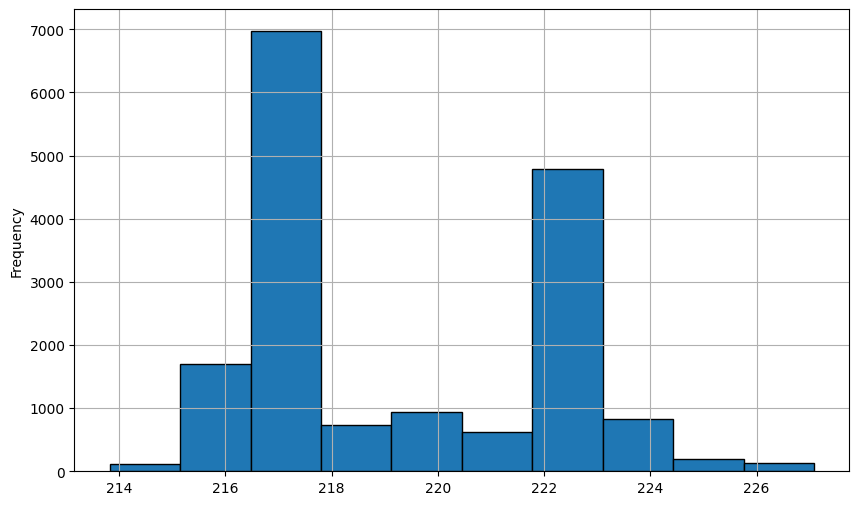

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df['distance_to_school'], bins=10, edgecolor='k')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
#code here
print("close houses", houses_close["median_house_value"].mean())
print("far houses", houses_far["median_house_value"].mean())


close houses 213172.92867132867
far houses 198891.91616595135


In [40]:
st.ttest_ind(houses_close["median_house_value"],houses_far["median_house_value"], equal_var=False)

TtestResult(statistic=7.861280116863971, pvalue=4.065575327059944e-15, df=14677.473247642047)